# Time Series Forecasting

In [5]:
#Importing Necessary Libraries

In [6]:
import pandas as pd
import numpy as np
from datetime import datetime
from pandas import Series
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

In [7]:
#Reading Data file
df=pd.read_csv('Day1.csv')

In [8]:
#Dropping columns name
df=df.drop('Unnamed: 0',1)

In [9]:
#Printing data
df

,Month,Counsellor Name,Course Name,Fees Total,Fees Received,Fees Pending
0,2020-04-01 00:00:00,SK,CADM,5000,5000,0
1,2020-04-01 00:00:00,SK,CDCW,7500,7500,0
2,2020-04-01 00:00:00,SK,CDCW,9500,9500,0
3,2020-04-01 00:00:00,SK,CDCW,9500,9500,0
4,2020-04-01 00:00:00,SK,CDCW,9000,9000,0
...,...,...,...,...,...,...
2315,2021-07-01 00:00:00,Minali,CDCW,12000,12000,0
2316,2021-07-01 00:00:00,Garima,CDCW,15000,15000,0
2317,2021-07-01 00:00:00,Iqra,CCWS,9500,9500,0
2318,2021-07-01 00:00:00,Namarta,CDCW+Creative,20000,15000,5000


In [10]:
#Data types of each column
df.dtypes

Month              object
Counsellor Name    object
Course Name        object
Fees Total          int64
Fees Received       int64
Fees Pending        int64
dtype: object

In [11]:
#Parsing index for date time to make inference on basis of date
df['Datetime'] = pd.to_datetime(df.Month, format='%Y-%m-%d %H:%M:%S')

In [12]:
#New dataset
df

,Month,Counsellor Name,Course Name,Fees Total,Fees Received,Fees Pending,Datetime
0,2020-04-01 00:00:00,SK,CADM,5000,5000,0,2020-04-01
1,2020-04-01 00:00:00,SK,CDCW,7500,7500,0,2020-04-01
2,2020-04-01 00:00:00,SK,CDCW,9500,9500,0,2020-04-01
3,2020-04-01 00:00:00,SK,CDCW,9500,9500,0,2020-04-01
4,2020-04-01 00:00:00,SK,CDCW,9000,9000,0,2020-04-01
...,...,...,...,...,...,...,...
2315,2021-07-01 00:00:00,Minali,CDCW,12000,12000,0,2021-07-01
2316,2021-07-01 00:00:00,Garima,CDCW,15000,15000,0,2021-07-01
2317,2021-07-01 00:00:00,Iqra,CCWS,9500,9500,0,2021-07-01
2318,2021-07-01 00:00:00,Namarta,CDCW+Creative,20000,15000,5000,2021-07-01


In [13]:
#Adding three columns for inferences on the basis of year, month and day
df['year'] = df.Datetime.dt.year
df['months'] = df.Datetime.dt.month
df['day'] = df.Datetime.dt.day

In [14]:
df

,Month,Counsellor Name,Course Name,Fees Total,Fees Received,Fees Pending,Datetime,year,months,day
0,2020-04-01 00:00:00,SK,CADM,5000,5000,0,2020-04-01,2020,4,1
1,2020-04-01 00:00:00,SK,CDCW,7500,7500,0,2020-04-01,2020,4,1
2,2020-04-01 00:00:00,SK,CDCW,9500,9500,0,2020-04-01,2020,4,1
3,2020-04-01 00:00:00,SK,CDCW,9500,9500,0,2020-04-01,2020,4,1
4,2020-04-01 00:00:00,SK,CDCW,9000,9000,0,2020-04-01,2020,4,1
...,...,...,...,...,...,...,...,...,...,...
2315,2021-07-01 00:00:00,Minali,CDCW,12000,12000,0,2021-07-01,2021,7,1
2316,2021-07-01 00:00:00,Garima,CDCW,15000,15000,0,2021-07-01,2021,7,1
2317,2021-07-01 00:00:00,Iqra,CCWS,9500,9500,0,2021-07-01,2021,7,1
2318,2021-07-01 00:00:00,Namarta,CDCW+Creative,20000,15000,5000,2021-07-01,2021,7,1


In [15]:
#Defining total fees collected over each month
x1 = df.groupby('months')['Fees Total'].mean()
x1

months
1     11089.440559
2     11311.323944
3     12419.512195
4     11861.877005
5     11049.874667
6     13821.094955
7     13048.751938
8     10641.816176
9     11174.062500
10    10737.592000
11     9995.682759
12    10661.859649
Name: Fees Total, dtype: float64

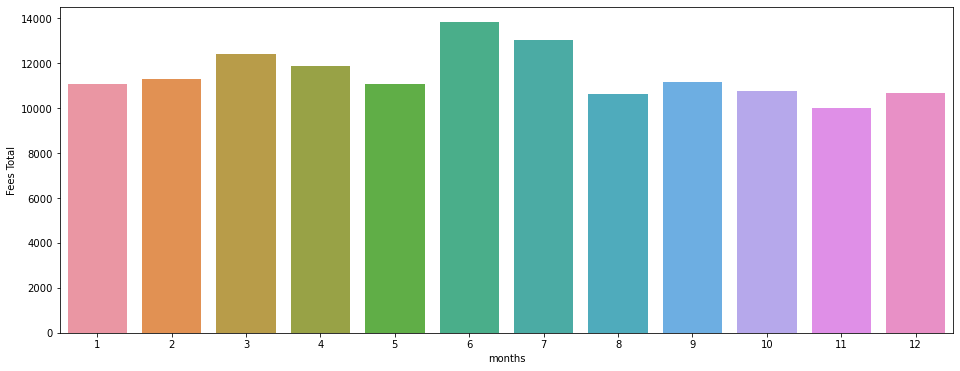

In [16]:
#Visualizing the collected fees month wise
import seaborn as sns
plt.figure(figsize=(16,6))

sns.barplot(x=x1.index, y=x1)

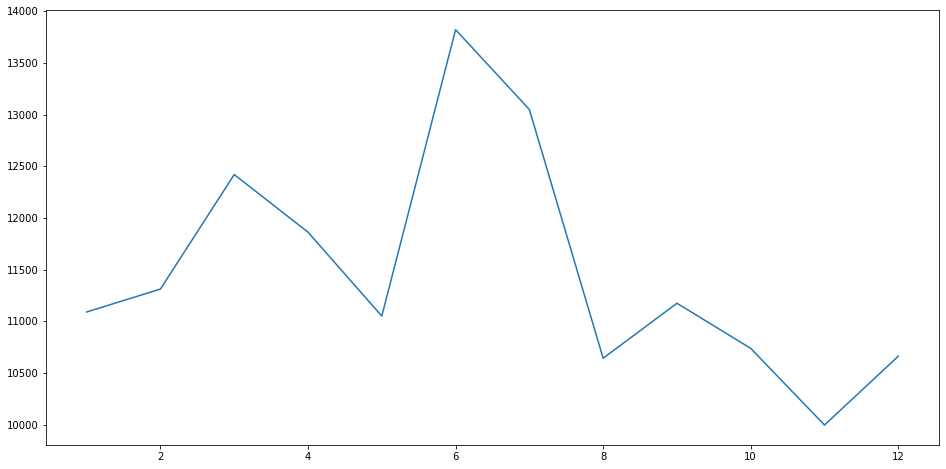

In [17]:
plt.figure(figsize=(16,8))
sns.lineplot(data=x1)

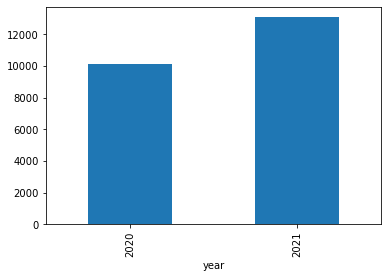

In [18]:
#Visualizing fees collected year wise
df.groupby('year')['Fees Total'].mean().plot.bar()

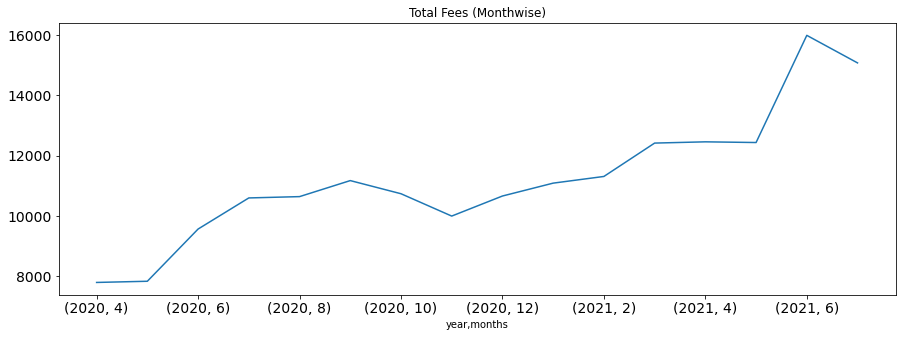

In [19]:
#Lets look mothly mean of each year seprately
x2=df.groupby(['year','months'])['Fees Total'].mean()
x2.plot(figsize=(15,5), title="Total Fees (Monthwise)", fontsize=14)

In [20]:
#Changing the index to month
df.set_index(df.Month)

,Month,Counsellor Name,Course Name,Fees Total,Fees Received,Fees Pending,Datetime,year,months,day
Month,,,,,,,,,,
2020-04-01 00:00:00,2020-04-01 00:00:00,SK,CADM,5000,5000,0,2020-04-01,2020,4,1
2020-04-01 00:00:00,2020-04-01 00:00:00,SK,CDCW,7500,7500,0,2020-04-01,2020,4,1
2020-04-01 00:00:00,2020-04-01 00:00:00,SK,CDCW,9500,9500,0,2020-04-01,2020,4,1
2020-04-01 00:00:00,2020-04-01 00:00:00,SK,CDCW,9500,9500,0,2020-04-01,2020,4,1
2020-04-01 00:00:00,2020-04-01 00:00:00,SK,CDCW,9000,9000,0,2020-04-01,2020,4,1
...,...,...,...,...,...,...,...,...,...,...
2021-07-01 00:00:00,2021-07-01 00:00:00,Minali,CDCW,12000,12000,0,2021-07-01,2021,7,1
2021-07-01 00:00:00,2021-07-01 00:00:00,Garima,CDCW,15000,15000,0,2021-07-01,2021,7,1
2021-07-01 00:00:00,2021-07-01 00:00:00,Iqra,CCWS,9500,9500,0,2021-07-01,2021,7,1


In [21]:
 #Splitting Dataset

In [22]:
df['Course Name'].nunique()

167

In [23]:
x3 = df.groupby('Datetime')['Fees Total'].sum()

In [24]:
x3

Datetime
2020-04-01     187000
2020-05-01     884935
2020-06-01    1090372
2020-07-01    1239974
2020-08-01    1447287
2020-09-01    1072710
2020-10-01    1342199
2020-11-01    1449374
2020-12-01    1823178
2021-01-01    1585790
2021-02-01    1606208
2021-03-01    2546000
2021-04-01    2031171
2021-05-01    3258768
2021-06-01    3567337
2021-07-01    2126604
Name: Fees Total, dtype: int64

In [25]:
Train=pd.DataFrame(x3.loc['2020-04-01':'2021-03-01'])
valid=pd.DataFrame(x3.loc['2021-03-01':'2021-07-01'])

In [26]:
valid['Fees Total']

Datetime
2021-03-01    2546000
2021-04-01    2031171
2021-05-01    3258768
2021-06-01    3567337
2021-07-01    2126604
Name: Fees Total, dtype: int64

In [27]:
Train

,Fees Total
Datetime,
2020-04-01,187000
2020-05-01,884935
2020-06-01,1090372
2020-07-01,1239974
2020-08-01,1447287
2020-09-01,1072710
2020-10-01,1342199
2020-11-01,1449374
2020-12-01,1823178


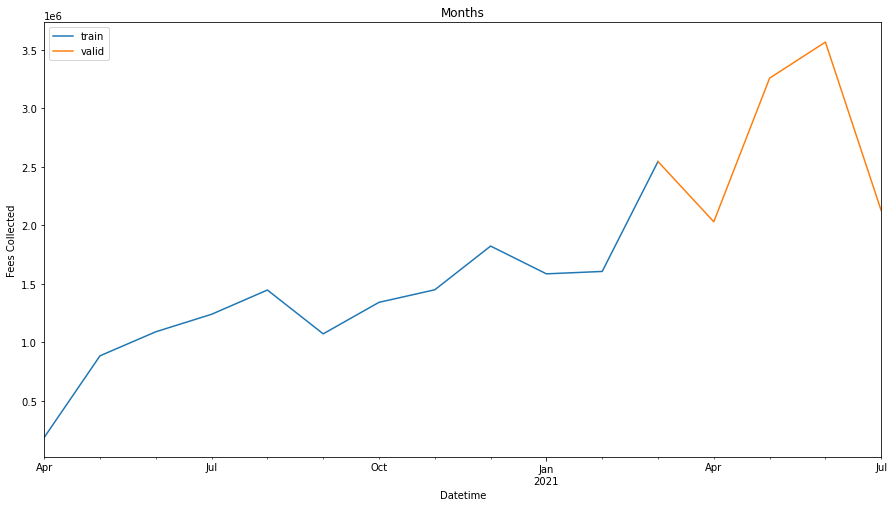

In [28]:
#Visualizing dataset in training and validation set
plt.figure(figsize=(15,8))
Train['Fees Total'].plot(title='Fees Generated', label='train')
valid['Fees Total'].plot(title='Months', label='valid')
plt.xlabel("Datetime")
plt.ylabel("Fees Collected")
plt.legend(loc="best")
plt.show()

# Naive Approach
In naive approach, the last value of training data is predicted for forecasting data or for future data.


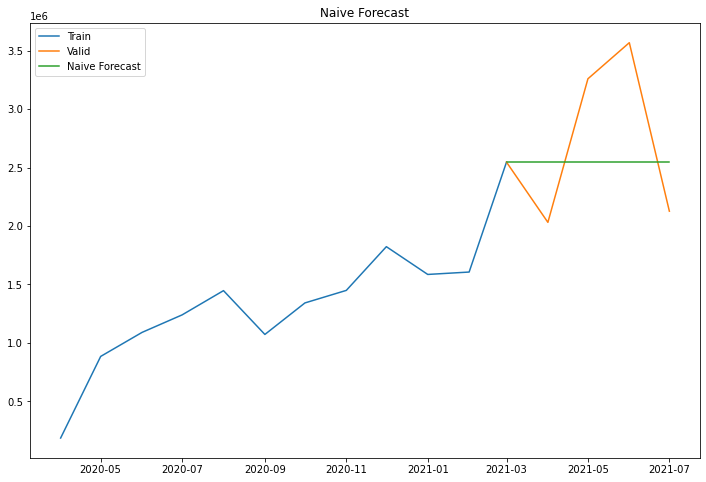

In [29]:
dd=np.asarray(Train['Fees Total'])
y_hat=valid.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(Train.index, Train['Fees Total'], label='Train')
plt.plot(valid.index, valid['Fees Total'], label='Valid')
plt.plot(y_hat.index, y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [30]:
#Calculating RMSE 
from sklearn.metrics import mean_squared_error
from math import sqrt

In [31]:
rms=sqrt(mean_squared_error(valid['Fees Total'], y_hat.naive))
print(rms)

631206.6846049716


# Moving Average
In this method, we take average of some last observations and forecasting in done on that basis.
a. For eg, we have done experiment by taking last 3, 5 and 10 observations.

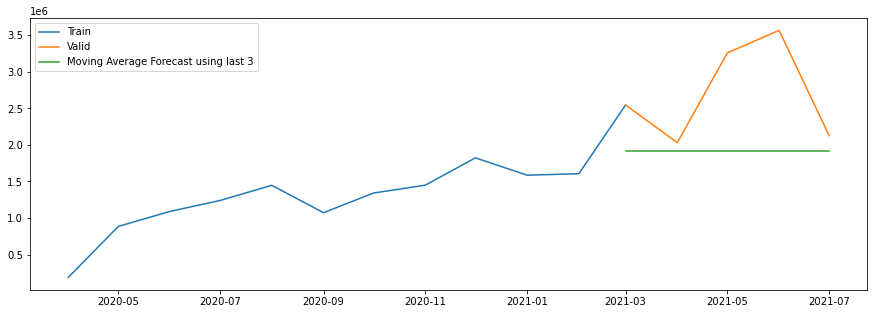

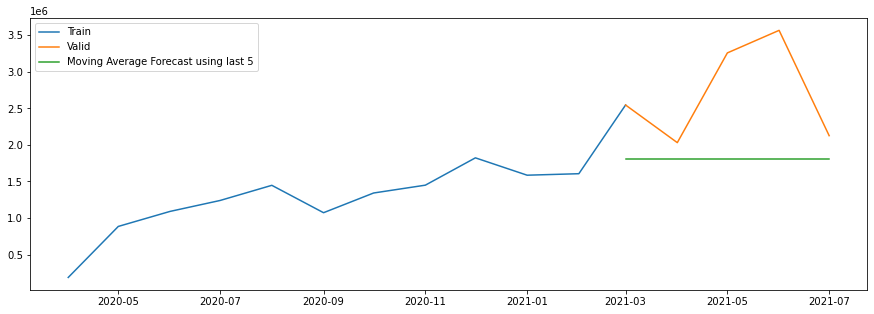

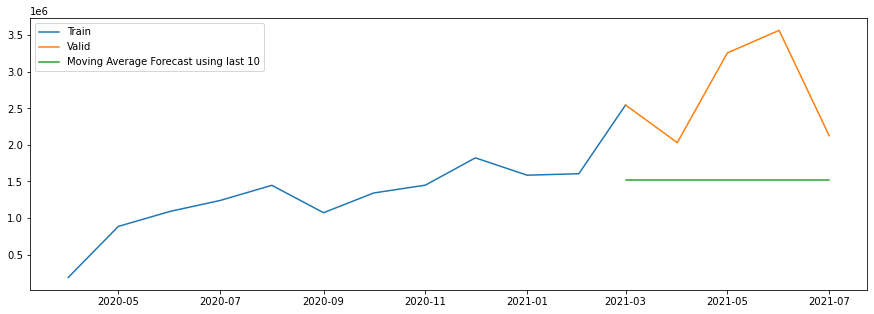

In [32]:
y_hat_avg=valid.copy()
y_hat_avg['moving_avg_forecast']=Train['Fees Total'].rolling(3).mean().iloc[-1] #average of last 3 observations.
plt.figure(figsize=(15,5))
plt.plot(Train['Fees Total'], label='Train')
plt.plot(valid['Fees Total'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using last 3')
plt.legend(loc='best')
plt.show()
y_hat_avg=valid.copy()
y_hat_avg['moving_avg_forecast']=Train['Fees Total'].rolling(5).mean().iloc[-1] #average of last 5 observations.
plt.figure(figsize=(15,5))
plt.plot(Train['Fees Total'], label='Train')
plt.plot(valid['Fees Total'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using last 5')
plt.legend(loc='best')
plt.show()
y_hat_avg=valid.copy()
y_hat_avg['moving_avg_forecast']=Train['Fees Total'].rolling(10).mean().iloc[-1] #average of last 10 observations.
plt.figure(figsize=(15,5))
plt.plot(Train['Fees Total'], label='Train')
plt.plot(valid['Fees Total'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using last 10')
plt.legend(loc='best')
plt.show()


In [33]:
rms=sqrt(mean_squared_error(valid['Fees Total'], y_hat_avg.moving_avg_forecast))
print(rms)

1333654.8724224868


# Simple Exponential Smoothing
In Exponential Smoothing, the far observations get less weightage and recent observations got more weightage.

In [34]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

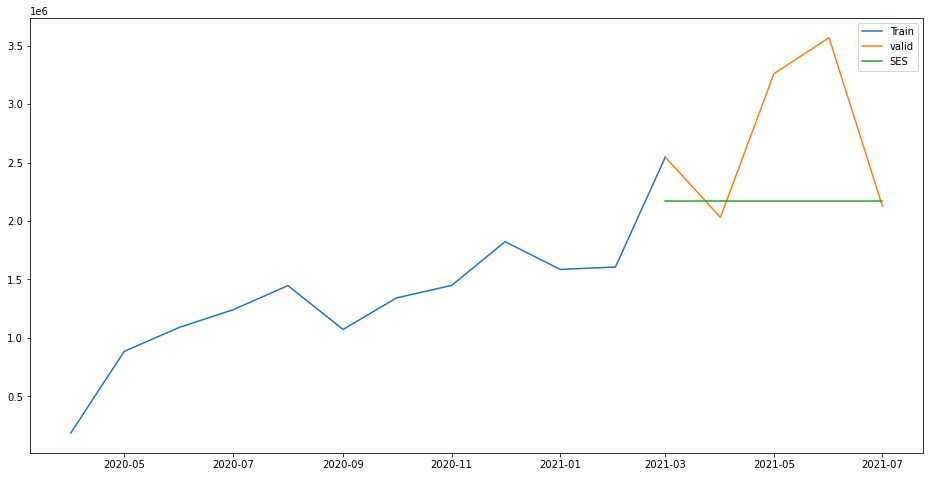

In [35]:
y_hat_avg=valid.copy()
fit2=SimpleExpSmoothing(np.asarray(Train['Fees Total'])).fit(smoothing_level=0.6, optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(valid))
plt.figure(figsize=(16,8))
plt.plot(Train['Fees Total'], label='Train')
plt.plot(valid['Fees Total'], label="valid")
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [36]:
rms=sqrt(mean_squared_error(valid['Fees Total'], y_hat_avg.SES))
print(rms)

812052.2644676333


# Holts Linear Trend Model
In this method, we take trend of data also into consideration with simple exponential smoothing.

In [37]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(Train['Fees Total']).plot()
result = sm.tsa.stattools.adfuller(train['Fees Total'])
plt.show()

ValueError: x must have 2 complete cycles requires 24 observations. x only has 12 observation(s)

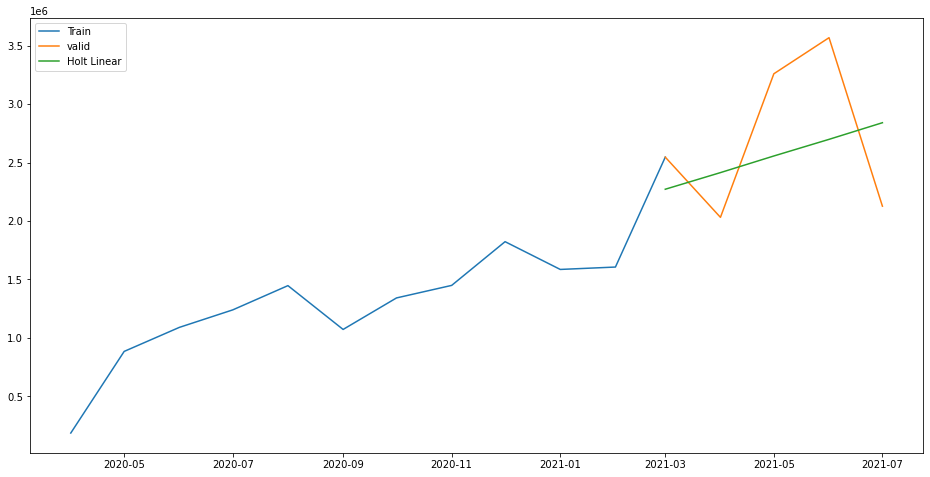

In [38]:
y_hat_avg=valid.copy()
fit1=Holt(np.asarray(Train['Fees Total'])).fit(smoothing_level=0.3, smoothing_slope=0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(valid))
plt.figure(figsize=(16,8))
plt.plot(Train['Fees Total'], label='Train')
plt.plot(valid['Fees Total'], label="valid")
plt.plot(y_hat_avg['Holt_linear'], label='Holt Linear')
plt.legend(loc='best')
plt.show()

In [39]:
rms=sqrt(mean_squared_error(valid['Fees Total'], y_hat_avg.Holt_linear))
print(rms)

629378.4530801494


# Holt's Winter Model
The previous methods doesn’t take seasonality into account. This method takes trend and seasonality both to predict future fees.

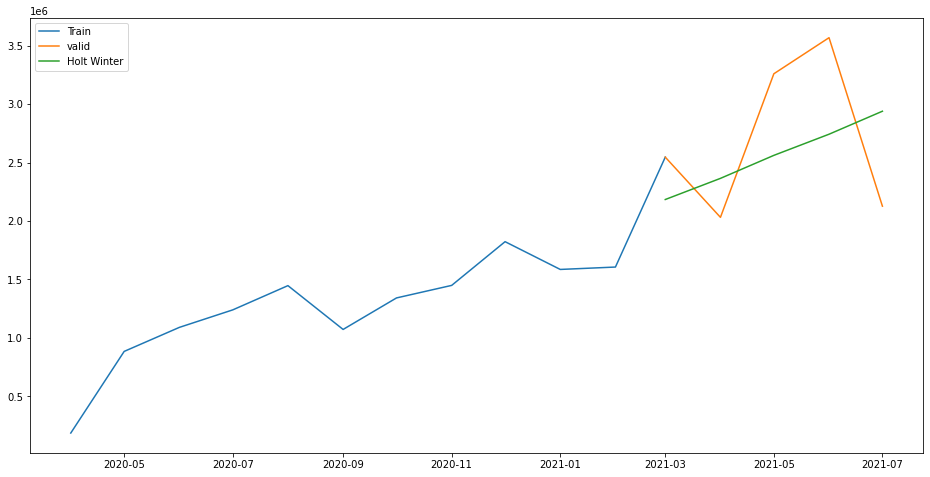

In [40]:
y_hat_avg=valid.copy()
fit1=ExponentialSmoothing(np.asarray(Train['Fees Total']), seasonal_periods=2, trend='add', seasonal='add').fit()
y_hat_avg['Holt_Winter']=fit1.forecast(len(valid))
plt.figure(figsize=(16,8))
plt.plot(Train['Fees Total'], label='Train')
plt.plot(valid['Fees Total'], label="valid")
plt.plot(y_hat_avg['Holt_Winter'], label='Holt Winter')
plt.legend(loc='best')
plt.show()

In [41]:
rms=sqrt(mean_squared_error(valid['Fees Total'], y_hat_avg.Holt_Winter))
print(rms)

643377.3038888962


# Combining all dataset

In [48]:
#We have defined the fuction to combine all the different sheets of excel file in one csv and return the merged_dataset.
def read_sheets(path):
    merge_df=pd.DataFrame()
    for i in range(1,6):
        print("Sheet", i+1)
        df = pd.read_excel(path, sheet_name=i)
        columns=df.iloc[0]
        df.columns=columns     #Giving column name
        df=df.drop(df.index[0])
        df=df[df.columns[0]]
        df=pd.DataFrame(df)
        df = df.rename(columns={df.columns[0]:"Month"})
        df['Datetime'] = pd.to_datetime(df.Month,errors='coerce', format='%Y-%m-%d %H:%M:%S')
        print(df.head(5))
    return merge_df

In [49]:
merged_df = read_sheets("Data Sheet for Interns.xlsx")

Sheet 2
                 Month   Datetime
1  2020-04-01 00:00:00 2020-04-01
2  2020-04-01 00:00:00 2020-04-01
3  2020-04-01 00:00:00 2020-04-01
4  2020-04-01 00:00:00 2020-04-01
5  2020-04-01 00:00:00 2020-04-01
Sheet 3
       Month   Datetime
1 2020-04-01 2020-04-01
2 2020-04-01 2020-04-01
3 2020-04-01 2020-04-01
4 2020-04-01 2020-04-01
5 2020-04-01 2020-04-01
Sheet 4
       Month   Datetime
1 2020-04-01 2020-04-01
2 2020-04-01 2020-04-01
3 2020-04-01 2020-04-01
4 2020-04-01 2020-04-01
5 2020-04-01 2020-04-01
Sheet 5
       Month   Datetime
1 2021-03-01 2021-03-01
2 2021-03-01 2021-03-01
3 2021-03-01 2021-03-01
4 2021-03-01 2021-03-01
5 2021-03-01 2021-03-01
Sheet 6
       Month   Datetime
1 2020-11-01 2020-11-01
2 2020-11-01 2020-11-01
3 2020-11-01 2020-11-01
4 2020-11-01 2020-11-01
5 2020-11-01 2020-11-01
